# **Procesamiento de imágenes**

### Ciencia de Datos para Sensores Inteligentes/Tópicos Selectos en Sistemas Interactivos

*Estudiante: Cielo Aholiva Higuera Gutiérrez*

Este notebook tiene como objetivo explorar diversas librerías de Python para el procesamiento de imágenes, aplicando más de cinco herramientas para su tratamiento.

Importar librerias

In [1]:
!pip install mahotas --quiet
!pip install SimpleITK --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 9.0 MB/s eta 0:00:00


In [12]:
# Data
import cv2
import numpy as np
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# Images
from PIL import Image, ImageEnhance
from google.colab.patches import cv2_imshow
from skimage import segmentation, color, io
from skimage import graph
import requests
from io import BytesIO
from scipy.ndimage import rotate
from scipy.ndimage import zoom
from scipy.fft import fft2, ifft2, fftshift
from mahotas.thresholding import otsu
import mahotas as mh
import SimpleITK as sitk
from moviepy.editor import VideoFileClip
from IPython.display import display, Video
import moviepy.editor as mp


# Others
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **OpenCV**

Esta paquetería es ampliamente utilizada para el procesamiento de imágenes y visión por computadora. Proporciona herramientas para lectura, modificación y análisis de imágenes y videos.

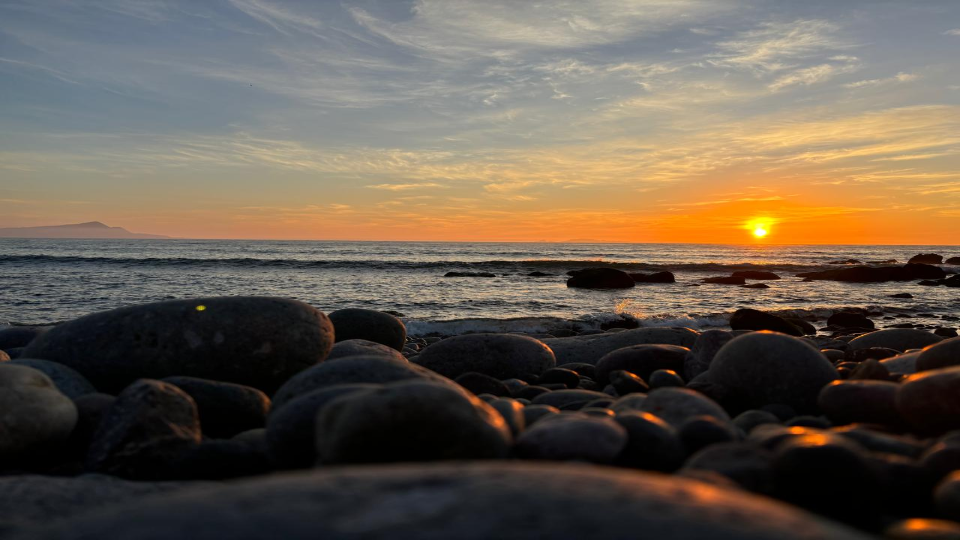

In [4]:
image_path = "/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/ensenadaFeb.jpg"
image = cv2.imread(image_path) # Cargar la imagen
new_size = (960, 540) # Definir el tamaño de la imagen
resized_image = cv2.resize(image, new_size) # Redimensionar la imagen
cv2_imshow(resized_image)

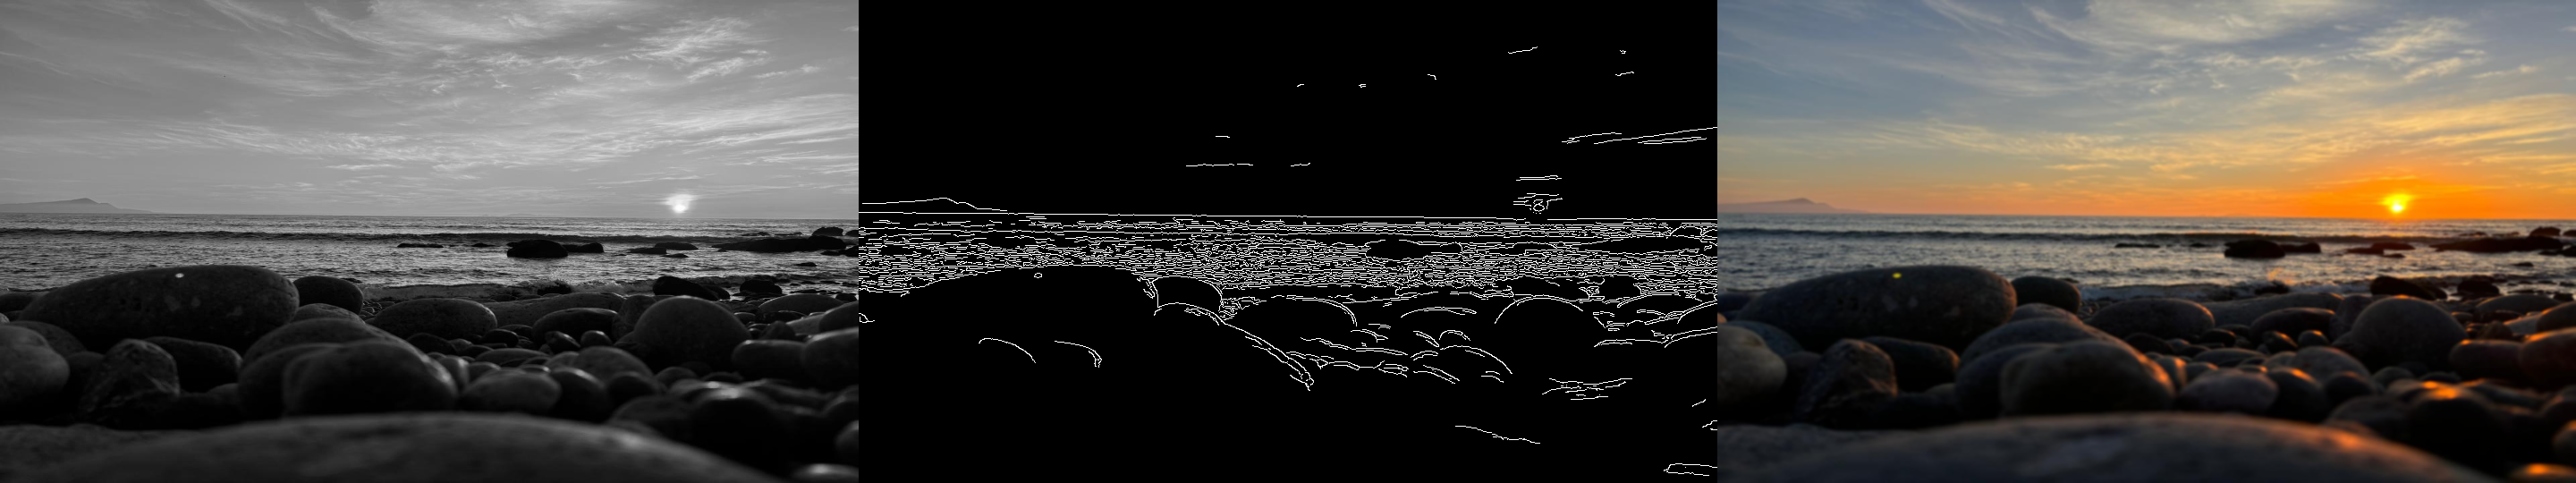

In [5]:
gray, edges, blurred = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY), cv2.Canny(resized_image, 100, 200), cv2.GaussianBlur(resized_image, (5, 5), 0)

# Convertir imágenes en escala de grises a formato BGR (para alinearlas con la imagen original)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

horizontal_stack = np.hstack((gray_bgr, edges_bgr, blurred)) # Imagen a escala grises, detencción de bordes con Canny e imagen con filtro Guassiano
cv2_imshow(horizontal_stack)

## **Pillow (PIL Fork)**

Pillow es una biblioteca de Python especializada en el procesamiento y manipulación de imágenes. En esta sección, se ajustarán los colores para crear una marca de agua, la cual se superpondrá sobre una imagen

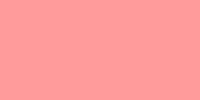

In [ ]:
# Crear un arreglo de colores (marca de agua)
colors_array = np.zeros((100, 200, 4), dtype=np.uint8)  # 100x200 px, 4 canales (RGBA)
colors_array[:, :, 0] = 255  # Rojo
colors_array[:, :, 3] = 100  # Opacidad (transparencia)

# Convertir a imagen PIL
watermark = Image.fromarray(colors_array, mode="RGBA")
display(watermark)

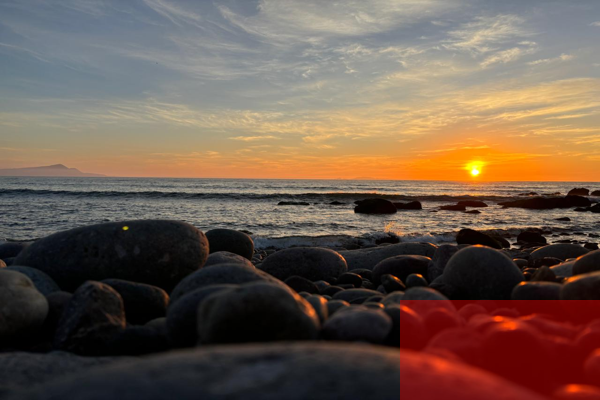

In [ ]:
image_path = "/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/ensenadaFeb.jpg"
image = Image.open(image_path)

# Redimensionar la imagen a un tamaño más pequeño (por ejemplo, 600x400 px)
resized_image = image.resize((600, 400))

# Crear la marca de agua (array de colores)
colors_array = np.zeros((100, 200, 4), dtype=np.uint8)  # 100x200 px, 4 canales (RGBA)
colors_array[:, :, 0] = 255  # Rojo
colors_array[:, :, 3] = 100  # Opacidad (transparencia)

# Convertir el array de NumPy a una imagen Pillow (marca de agua)
watermark = Image.fromarray(colors_array, mode="RGBA")
position = (resized_image.width - watermark.width, resized_image.height - watermark.height)

# Combinar las imágenes usando alpha_composite
merged_image = resized_image.copy()
merged_image.paste(watermark, position, watermark)

display(merged_image)

## **Spicy**

spaCy es una biblioteca de Python especializada en el procesamiento de lenguaje natural. Su objetivo principal es ofrecer herramientas eficientes para trabajar con texto y realizar tareas complejas de análisis lingüístico. En esta sección, se creará un tratamiento de un patrón geométrico, seguido de la aplicación de transformaciones de patrones utilizando esta biblioteca.

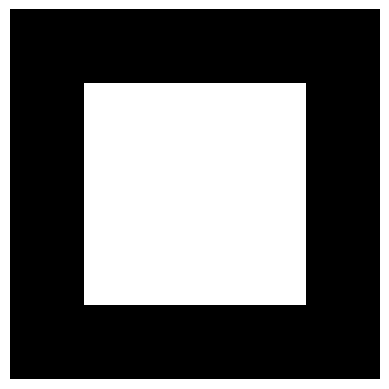

In [ ]:
# Crear una matriz de 10x10 y hacer un cuadrado (por ejemplo, el borde del cuadrado está en 1)
square_pattern = np.zeros((10, 10), dtype=np.uint8)

square_pattern[2:8, 2:8] = 1  # Crear un cuadrado en el centro

plt.imshow(square_pattern, cmap='gray')
plt.axis('off')
plt.show()

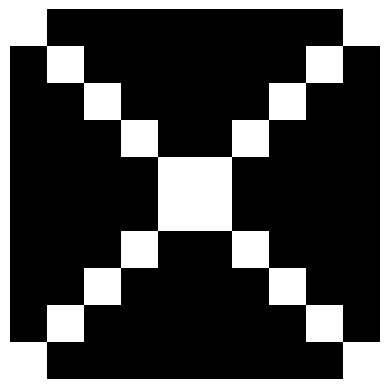

In [ ]:
# Crear una matriz de 10x10 con líneas diagonales
line_pattern = np.zeros((10, 10), dtype=np.uint8)

# Dibujar dos líneas diagonales
np.fill_diagonal(line_pattern, 1)  # Línea diagonal de arriba a abajo
np.fill_diagonal(np.fliplr(line_pattern), 1)  # Línea diagonal de abajo a arriba


plt.imshow(line_pattern, cmap='gray')
plt.axis('off')
plt.show()

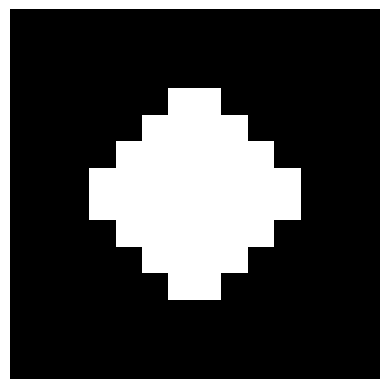

In [ ]:
# Rotar el patrón cuadrado
rotated_square = rotate(square_pattern, 45, reshape=True)

# Imagen rotada
plt.imshow(rotated_square, cmap='gray')
plt.axis('off')
plt.show()

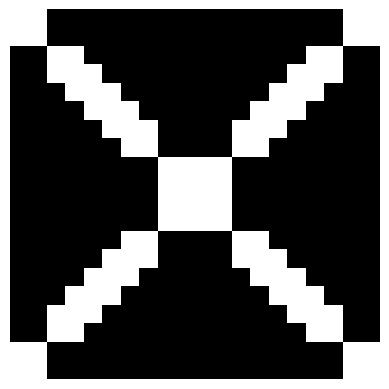

In [ ]:
# Escalar el patrón de líneas diagonales (aumentar el tamaño)
scaled_lines = zoom(line_pattern, 2)  # Escala 2x

# Imagen escalada
plt.imshow(scaled_lines, cmap='gray')
plt.axis('off')
plt.show()

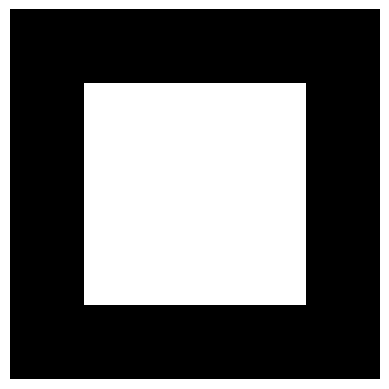

In [ ]:
flipped_square = np.fliplr(square_pattern)

# Imagen volteada
plt.imshow(flipped_square, cmap='gray')
plt.axis('off')
plt.show()

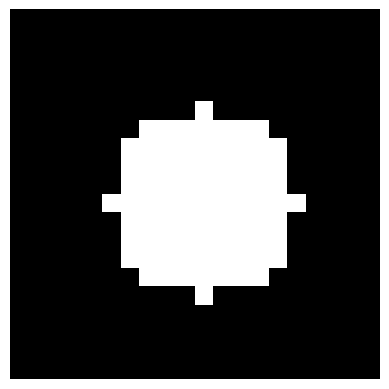

In [ ]:
r = 5  # Radio del círculo
circle_pattern = np.zeros((20, 20), dtype=np.uint8)

# Definir el círculo usando la ecuación (x - cx)^2 + (y - cy)^2 < r^2
cx, cy = 10, 10  # Centro del círculo
for x in range(20):
    for y in range(20):
        if (x - cx)**2 + (y - cy)**2 <= r**2:
            circle_pattern[x, y] = 1

# Patrón de círculo
plt.imshow(circle_pattern, cmap='gray')
plt.axis('off')
plt.show()

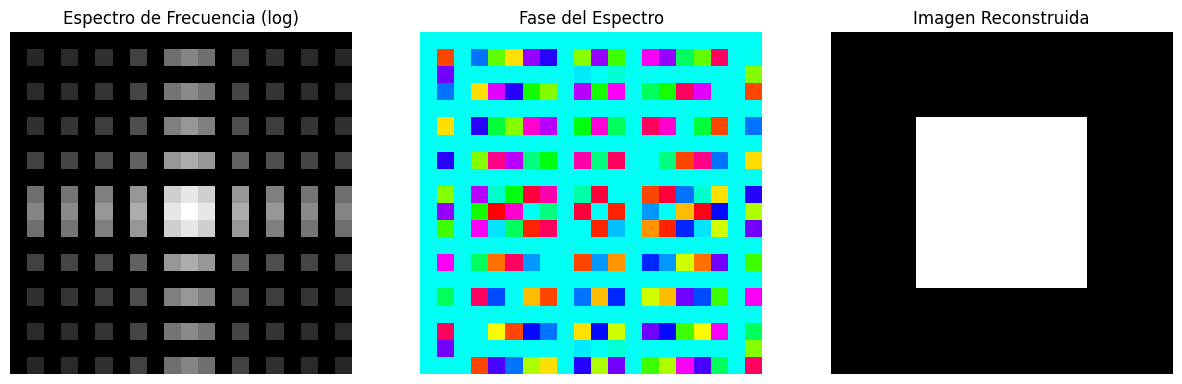

In [ ]:
# Crear una imagen simple
image = np.zeros((20, 20), dtype=np.uint8)
image[5:15, 5:15] = 1  # Crear un cuadrado en el centro

# Aplicar la transformada de Fourier 2D
image_fft = fft2(image)

# Hacer el cambio al centro de la imagen
image_fft_shifted = fftshift(image_fft)

# Aplicar la transformada inversa de Fourier 2D
image_ifft = ifft2(image_fft).real

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Espectro de frecuencia (log)
axs[0].imshow(np.log(1 + np.abs(image_fft_shifted)), cmap='gray')
axs[0].set_title('Espectro de Frecuencia (log)')
axs[0].axis('off')

# Fase del espectro
axs[1].imshow(np.angle(image_fft_shifted), cmap='hsv')
axs[1].set_title('Fase del Espectro')
axs[1].axis('off')

# Imagen reconstruida
axs[2].imshow(image_ifft, cmap='gray')
axs[2].set_title('Imagen Reconstruida')
axs[2].axis('off')

plt.show()

## **Mahotas**

En esta sección, se utilizará la biblioteca Mahotas para procesar imágenes. Se aplicarán técnicas como el suavizado con filtro Gaussiano, la detección de bordes mediante el operador Sobel y la binarización utilizando el umbral de Otsu.

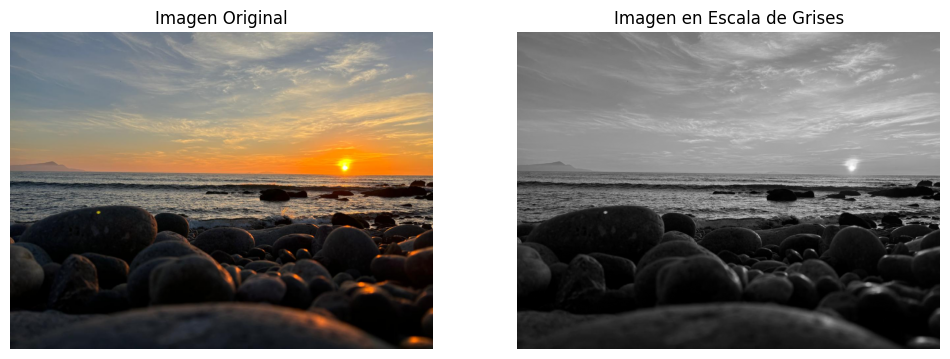

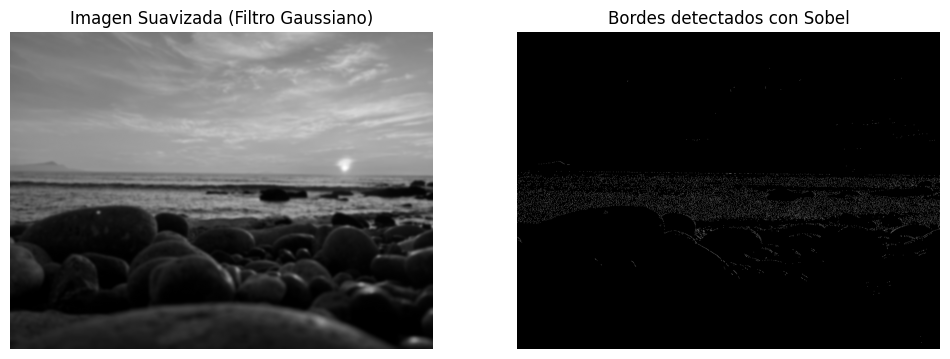

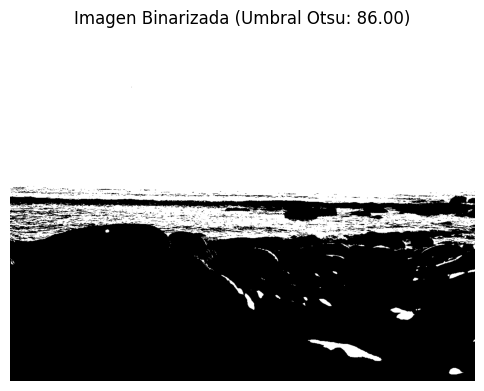

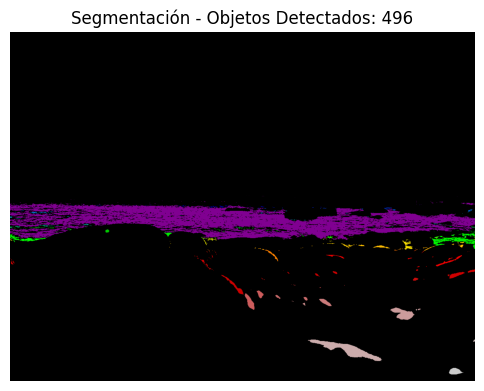

In [ ]:
image = mh.imread('/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/ensenadaFeb.jpg')
# Convertir a escala de grises
gray_image = mh.colors.rgb2gray(image)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image)
axs[0].set_title('Imagen Original')
axs[0].axis('off')

axs[1].imshow(gray_image, cmap='gray')
axs[1].set_title('Imagen en Escala de Grises')
axs[1].axis('off')

plt.show()

# Aplicar filtro Gaussiano para suavizar la imagen
smoothed = mh.gaussian_filter(gray_image, sigma=3)

# Aplicar detector de bordes Sobel
sobel_edges = mh.sobel(gray_image) # Calcula los bordes en la imagen usando el operador Sobel
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(smoothed, cmap='gray')
axs[0].set_title('Imagen Suavizada (Filtro Gaussiano)')
axs[0].axis('off')

axs[1].imshow(sobel_edges, cmap='gray')
axs[1].set_title('Bordes detectados con Sobel')
axs[1].axis('off')

plt.show()

gray_image_uint8 = gray_image.astype(np.uint8)
threshold_value = otsu(gray_image_uint8)

binary_image = gray_image > threshold_value

# Imagen binarizada
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title(f'Imagen Binarizada (Umbral Otsu: {threshold_value:.2f})')
plt.axis('off')
plt.show()

# Identificar regiones (objetos segmentados)
labeled, num_objects = mh.label(binary_image)

plt.figure(figsize=(6, 6))
plt.imshow(labeled, cmap='nipy_spectral')
plt.title(f'Segmentación - Objetos Detectados: {num_objects}')
plt.axis('off')
plt.show()

## **SimpleITK**

SimpleITK es una biblioteca de Python enfocada en el procesamiento de imágenes médicas. Ofrece herramientas intuitivas para trabajar con imágenes en 2D y 3D, permitiendo tareas como la lectura, escritura, segmentación, registro y visualización de imágenes. En esta sección, se llevará a cabo el procesamiento de una imagen de resonancia magnética.

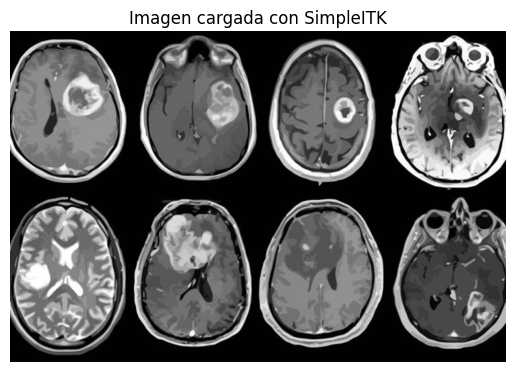

In [6]:
# Cargar imagen desde un archivo
image = sitk.ReadImage('/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/resonancia_magnetica.jpg')

# Convertir la imagen a un array de NumPy para visualización
image_array = sitk.GetArrayFromImage(image)

# Mostrar la imagen
plt.imshow(image_array, cmap='gray')
plt.title('Imagen cargada con SimpleITK')
plt.axis('off')
plt.show()

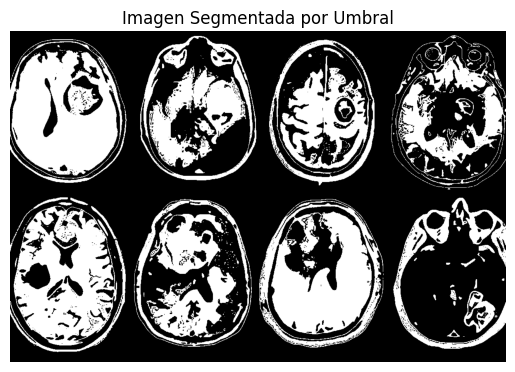

In [7]:
# Convertir a escala de grises
gray_image = sitk.Cast(sitk.RescaleIntensity(sitk.VectorIndexSelectionCast(image, 0)), sitk.sitkUInt8)

# Aplicar umbralización binaria (debe ser uint8)
binary_image = sitk.BinaryThreshold(gray_image, lowerThreshold=100, upperThreshold=200, insideValue=255, outsideValue=0)

# Convertir a array para mostrar
binary_array = sitk.GetArrayFromImage(binary_image)

# Imagen segmentada
plt.imshow(binary_array, cmap='gray')
plt.title('Imagen Segmentada por Umbral')
plt.axis('off')
plt.show()

## **MoviePy**

MoviePy es una biblioteca de Python especializada en la edición y manipulación de archivos de video. Permite realizar diversas tareas como concatenación de videos, adición de efectos visuales y sonoros, conversión de formatos, edición de audio, creación de animaciones y extracción de fragmentos específicos. En esta sección, se cargará un video y se utilizará la biblioteca OpenCV para detectar rostros en el.

In [11]:
video_path = ('/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/hiking.mp4')
clip = VideoFileClip(video_path)

# Recortar los primeros 10 segundos
trimmed_clip = clip.subclip(0, 10)
trimmed_clip.write_videofile("video_10s.mp4", codec="libx264", fps=clip.fps)
print("Video recortado y guardado como 'video_10s.mp4'")

Moviepy - Building video video_10s.mp4.
MoviePy - Writing audio in video_10sTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video video_10s.mp4



Moviepy - Done !
Moviepy - video ready video_10s.mp4
Video recortado y guardado como 'video_10s.mp4'


In [18]:
output_path = "/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/trimmed_video.mp4"
trimmed_clip.write_videofile(output_path, codec="libx264", fps=clip.fps)
display(Video(output_path, embed=True))

Output hidden; open in https://colab.research.google.com to view.

In [21]:
# Ruta del video recortado
input_path = "/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/trimmed_video.mp4"
output_path = "/content/drive/MyDrive/CDSI/Notebooks/Notebook 2/output_faces.mp4"

# Cargar el detector de rostros de OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(input_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Configurar el video de salida
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir a escala de grises para mejorar detección
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar rostros
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Dibujar rectángulos en los rostros detectados
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Guardar el frame procesado
    out.write(frame)

# Liberar recursos
cap.release()
out.release()
cv2.destroyAllWindows()

print("Video procesado y guardado en:", output_path)
display(Video(output_path, embed=True))

Output hidden; open in https://colab.research.google.com to view.

Enlace para ver video: https://drive.google.com/file/d/1--I1adaaquN_yz1l13lUjovVAdmW47fh/view?usp=sharing